## problem 1

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [40]:
delivery = pd.read_csv("delivery_time (1).csv")

In [41]:
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [42]:
delivery.shape

(21, 2)

In [43]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [44]:
delivery[delivery.duplicated()].shape

(0, 2)

In [45]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


##### Observations :-
The mean value and the median value (50% or percentile) are not having much difference between them.
Also there is not a big difference in the 75% value and max value for both the features
From observations, 1 and 2 we can say that there is no outlier in the dataset.

### Understanding target variables¶
Our target variable is Delivery time and we need to predict the Delivery time based on the Sorting time

In [46]:
delivery["Delivery Time"].unique()

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

Observations :-
The Delivery time variable here is a continuous variable and is numerical data### 

In [47]:
delivery["Delivery Time"].value_counts()

16.68    1
19.83    1
13.50    1
19.75    1
24.00    1
29.00    1
19.00    1
9.50     1
18.75    1
10.75    1
15.35    1
14.88    1
11.50    1
13.75    1
8.00     1
12.03    1
21.50    1
18.11    1
17.90    1
17.83    1
21.00    1
Name: Delivery Time, dtype: int64

### Observations :-
We could see that al the observations have only 1 count which means they are unique. There are no duplicates in our data

## Data visualization
Performing univariate analysis using boxplot. Boxplots are very intuitive for checking any outlier data

<AxesSubplot:>

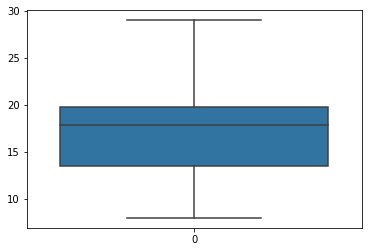

In [48]:
sns.boxplot(data=[delivery["Delivery Time"]])

<AxesSubplot:>

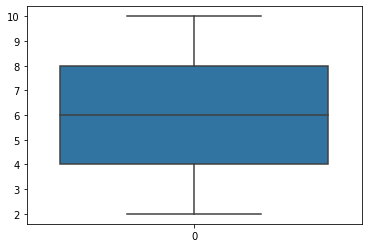

In [49]:
sns.boxplot(data=[delivery["Sorting Time"]])

###  Observations :-
There are no outliers in both Delivery time and Sorting time variables. So, we are good to proceed with our model prediction part. The outliers usually reduces the accuracy the model and might give incorrect predictions results.
By observing the box plot of Delivery Time we can also see that the median line of the plot is slight towards the lower portion of the box. We can say that the data points are negatively skewed.
We will plot a density plot which also helps the see the distribution of the data and give insight regarding skewness.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

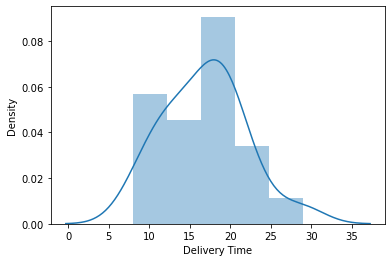

In [50]:
sns.distplot(delivery["Delivery Time"])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

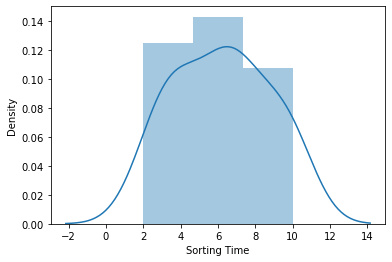

In [51]:
sns.distplot(delivery["Sorting Time"])

## Observations :-
In the density plot of Delivery time, we can observe a slight negative skewness
The density plot of Sorting time is a bell shaped curve and looks like it is normal distribution

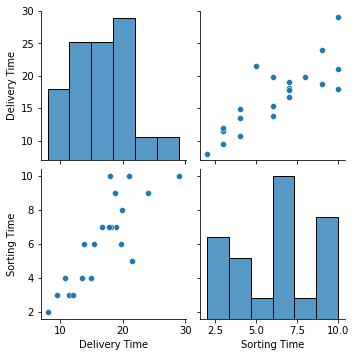

In [52]:
sns.pairplot(delivery)

### Observations :-
There is a positive correlation between the Delivery time and the Sorting time. We can see Delivery time increases as sorting time increases and vice versa..



### Heatmap
Heatmap is a very effective technique to check the missing values in the dataset and to also understand if there is any correlation between the features of the data.

<AxesSubplot:>

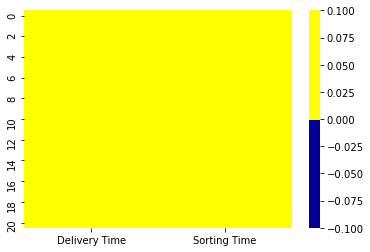

In [53]:
cols = delivery.columns
colour = ["#000099","#ffff00"]
sns.heatmap(delivery[cols].isnull(),cmap=sns.color_palette(colour))

### Observations :-
We don't have any missing values in our dataset. If it was present, there would be a different colour shade appearing on the red background.
We can check missing values by using isna() method as well.

### Correlation
The Correlation matrix is an important data analysis metric that is computed to summarize data to understand the relationship (correlation) between various variables and make decisions accordingly.

In [54]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

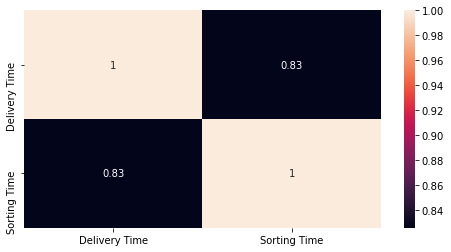

In [55]:
plt.figure(figsize=(8,4))
sns.heatmap(delivery.corr(),annot=True)

### Observations :-
The correlation value between Delivery time and Sorting Time is 0.83 which is not very much high. It is a positive correlation.

### Fitting a linear regression model
We need to predict the Delivery time based on the Sorting time. We have one dependent variable Delivery time and and one independent Sorting Time. So we can use linear regression algorithm to predict and fit the line.

In [56]:
delivery1 = delivery.rename({"Delivery Time":"DT"},axis=1)

In [57]:
delivery2 = delivery1.rename({"Sorting Time":"ST"},axis=1)

In [58]:
delivery2.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [59]:
model = smf.ols("DT~ST",data=delivery2).fit()

<AxesSubplot:xlabel='ST', ylabel='DT'>

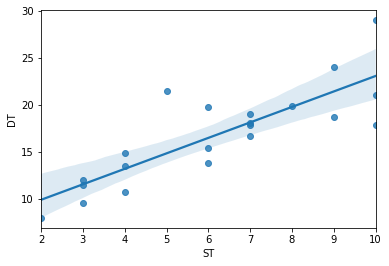

In [60]:
sns.regplot(x="ST",y="DT",data=delivery2)

In [61]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           3.98e-06
Time:                        11:48:26   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predict the Delivery time for new Sorting time values¶

In [63]:
newdata = pd.Series([12,14,16])

In [64]:
pred_new = pd.DataFrame(newdata,columns=["ST"])

In [65]:
model.predict(pred_new)

0    26.370973
1    29.669013
2    32.967052
dtype: float64

#### For Sorting time values of 12,14 and 16 we get the Delivery time predicted values as 26.37, 29.66 and 32.96 respectively.

## problem 2

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import statsmodels.formula.api as smf

In [67]:
salary = pd.read_csv("Salary_Data.csv")

In [68]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Data Insights

In [70]:
salary.shape

(30, 2)

### 
The dataset comprises of 30 observations and 2 features/variables. So, we have one variable which is independent and one is dependent.

We need to predict the Salary value based on the Years of Experience here. So, Salary is dependent variable (target) and Years of Expereience is independent variable in our case.

In [72]:
salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [73]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


######  We can see that both Years of Experience and Salary variables are having floating point data type values. We can also see that all 30 observations are non null and hence we don't have any missing values.

In [74]:
salary[salary.duplicated()].shape

(0, 2)

#### We don't have any duplicate values in our dataset. If duplicates values would have been present we would have to delete it.

### Summary statistics

In [75]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


#### Observations :-
The mean value and the median value (50% or percentile) are not having much difference between them.
Also there is not a big difference in the 75% value and max value for both the features
From observations, 1 and 2 we can say that there are no outliers in the dataset.


### Understanding target variable¶
Our target variable is Salary and we need to predict the Salary based on the number of years of experience

In [77]:
salary["Salary"].value_counts()

109431.0    1
37731.0     1
56957.0     1
57081.0     1
63218.0     1
91738.0     1
98273.0     1
46205.0     1
60150.0     1
105582.0    1
122391.0    1
64445.0     1
121872.0    1
112635.0    1
93940.0     1
39891.0     1
81363.0     1
57189.0     1
61111.0     1
56642.0     1
43525.0     1
101302.0    1
66029.0     1
55794.0     1
54445.0     1
39343.0     1
116969.0    1
67938.0     1
113812.0    1
83088.0     1
Name: Salary, dtype: int64

### Observations :-
We could see that all the observations have only 1 count which means they are unique. There are no duplicates in our data

### Data visualization
Performing univariate analysis using boxplot. Boxplots are very intuitive for checking any outlier data

<AxesSubplot:>

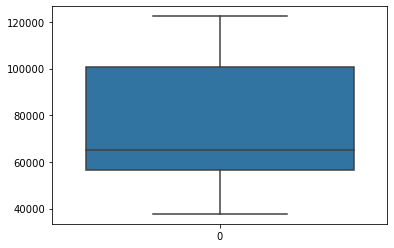

In [78]:
sns.boxplot(data=[salary["Salary"]])

<AxesSubplot:>

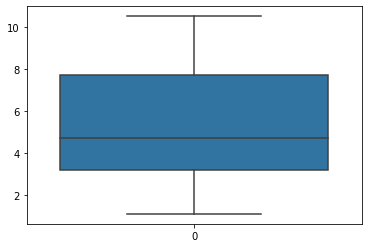

In [79]:
sns.boxplot(data=[salary["YearsExperience"]])

### Observations :-
There are no outliers in both Salary and Years Experience variables. So, we are good to proceed with our model prediction part. The outliers usually reduces the accuracy the model and might give incorrect predictions results.
By observing the box plot of Salary and Years Experience we can also see that the median line of the plot is slightly towards the upper portion of the box. We can say that the data points are positively skewed.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

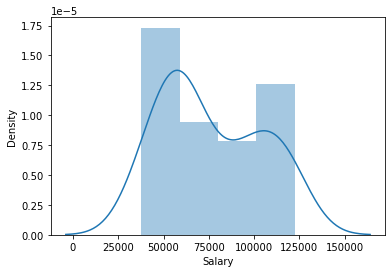

In [80]:
sns.distplot(salary["Salary"])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

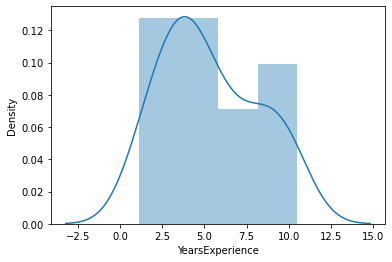

In [81]:
sns.distplot(salary["YearsExperience"])

### Observations :-
The density plot helps the see the distribution of the data and gives insights regarding skewness.

Both the both plots are positively skewed.

## Pairplots

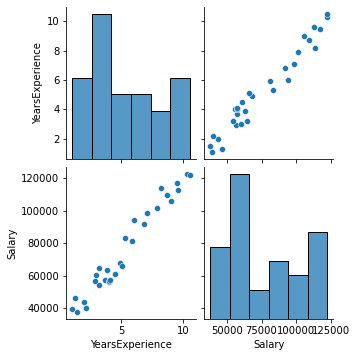

In [82]:
sns.pairplot(salary)

In [84]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### Observations :-
There is a positive correlation between Salary and Years of experience. As the years of experience increases the salary will increase.

## Heatmap
Heatmap is a very effective technique to check the missing values in the dataset and to also understand if there is any correlation between the features of the data

<AxesSubplot:>

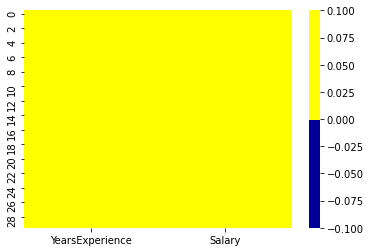

In [86]:
cols = salary.columns
colour = ["#000099","#ffff00"]
sns.heatmap(salary[cols].isnull(),cmap=sns.color_palette(colour))

### Observations :-
We don't have any missing values in our dataset. If it was present, there would be a different colour shade appearing on the red background.
We can check missing values by using isna() method as well.

In [87]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Correlation
The Correlation matrix is an important data analysis metric that is computed to summarize data to understand the relationship (correlation) between various variables and make decisions accordingly.

<AxesSubplot:>

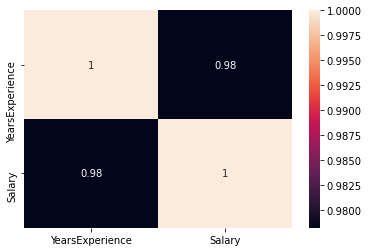

In [88]:
sns.heatmap(salary.corr(),annot=True)

## Fitting a linear regression model
We need to predict the Salary based on Experience. We have one dependent variable Salary and and one independent variable Experience. So we can use linear regression algorithm to predict and fit the line.

In [89]:
model = smf.ols("Salary~YearsExperience",data=salary).fit()

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

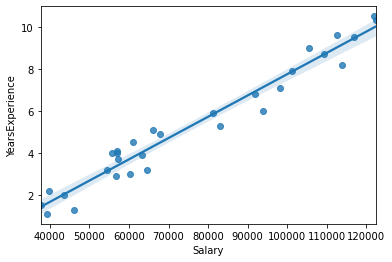

In [90]:
sns.regplot(x = "Salary",y = "YearsExperience",data=salary)

In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           1.14e-20
Time:                        12:16:43   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predict Salary for new Experience values

In [92]:
newdata = pd.Series([12,14,16])
pred_data = pd.DataFrame(newdata,columns=["YearsExperience"])

In [93]:
model.predict(pred_data)

0    139191.748056
1    158091.672699
2    176991.597342
dtype: float64

### For Years of experience 12,14 and 16 we get the predicted values of Salary as 139191.748056, 158091.672699 and 176991.597342 respectively.